In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [6]:
def generatedata():
    X=np.linspace(0,20)
    y=-2*X+1
    return X,y

In [7]:
x_points,y_points=generatedata()

In [8]:
x_points.shape

(50,)

In [13]:
def SGD(x_points,y_points,alpha,epochs):
    loss_list=[]
    theta0=0
    theta1=0
    iteration=0
    iteration_list=[]
    theta0_list=[]
    theta1_list=[]
    for i in range(epochs):
        for i in range(x_points.shape[0]):
            y_pred=theta0+theta1*x_points[i]
            lossfun=(1/2)*((y_pred-y_points[i])**2)
            loss_list.append(lossfun)
            theta0=theta0-alpha*(y_pred-y_points[i])
            theta0_list.append(theta0)
            theta1=theta1-alpha*((y_pred-y_points)*x_points[i])
            theta1_list.append(theta1)
            iteration_list.append(iteration)
            iteration+=1
    y_pred=theta0+theta1*x_points        
    hypothesis=theta0+theta1*x_points
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    return theta0,theta1,theta0_list,theta1_list,loss_list,iteration_list

In [37]:
theta0,theta1,theta0_list,theta1_list,loss_list,iteration_list=SGD(x_points,y_points,0.00015,10)

accuracy= 77.74779582042082 %


In [15]:
theta0a,theta1a,theta0_lista,theta1_lista,loss_lista,iteration_lista=SGD(x_points,y_points,0.0001,20)

accuracy= 75.1993047449824 %


In [17]:
theta0b,theta1b,theta0_listb,theta1_listb,loss_listb,iteration_listb=SGD(x_points,y_points,0.0002,30)

accuracy= 80.52700203488232 %


In [36]:
theta0c,theta1c,theta0_listc,theta1_listc,loss_listc,iteration_listc=SGD(x_points,y_points,0.000199,50)

accuracy= 78.39251902179615 %


In [39]:
theta0d,theta1d,theta0_listd,theta1_listd,loss_listd,iteration_listd=SGD(x_points,y_points,0.0002,70)

accuracy= 73.81749407600692 %


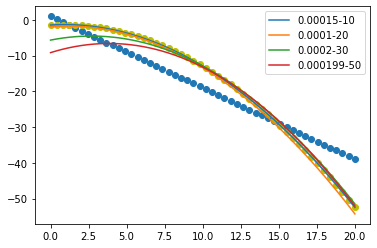

In [42]:
y_pred=theta0+theta1*x_points
y_preda=theta0a+theta1a*x_points
y_predb=theta0b+theta1b*x_points
y_predc=theta0c+theta1c*x_points
y_predd=theta0d+theta1d*x_points
fig, ax = plt.subplots()
ax.scatter(x_points,y_points)
ax.plot(x_points, y_pred,marker="o",color="y")
ax.plot(x_points,y_pred, label = "0.00015-10")
ax.plot(x_points,y_preda, label = "0.0001-20")
ax.plot(x_points, y_predb, label = "0.0002-30")
ax.plot(x_points, y_predc, label = "0.000199-50")

plt.legend()
plt.show()

In [34]:
50/7

7.142857142857143

In [43]:
from sklearn.metrics import r2_score

def minibatchGD(x_points,y_points,alpha,batch_size,epoch):
    loss_list=[]
    epochs=[]
    theta0_list=[]
    theta1_list=[]
    #theta0=0
    #theta1=0
    theta=np.array([0,0])
    m=x_points.shape[0]
    mat_ones=np.ones(x_points.shape) #(13,)
    #print("mat_ones",mat_ones.shape)
    data=np.stack((mat_ones,x_points),axis=1) #(50,2)
   # print("data",data)
    y_predkbera=[]
    y_predlist=[]
    max_iter=int(m/batch_size)
    iteration=0
    iteration_list=[]
    for i in range(epoch): 
          j=0
          p=batch_size
          for i in range(max_iter):
            X=data[j:p,:]
            y_pred=np.dot(X,theta)
            y_predlist.append(y_pred)
            y_pointsnew=y_points[j:p]
            z=y_pred-y_pointsnew
            grad=(1/batch_size)*np.dot(X.T,z)
            lossfun=(1/(2*batch_size))*(np.sum((y_pred-y_pointsnew)**2))
            epochs.append(i)
            theta=theta-alpha*grad
            theta0_list.append(theta[0])
            theta1_list.append(theta[1])
            f=j
            j=p
            p=f+batch_size
            loss_list.append(lossfun)
            iteration_list.append(iteration)
            iteration+=1
          if (np.linalg.norm(grad)<0.001):
                break
    theta0=theta[0]
    theta1=theta[1]
    y_pred=np.dot(data,theta)
    print("accuracy=",r2_score(y_points,y_pred)*100,"%")
    print("theta 0",theta[0])
    print("theta 1",theta[1])
    return theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list
   

In [44]:
theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list=minibatchGD(x_points,y_points,0.01,10,10)

accuracy= 99.68132971035573 %
theta 0 -0.15256524403392493
theta 1 -1.8871736316559735


Text(0.5, 1.0, 'var')

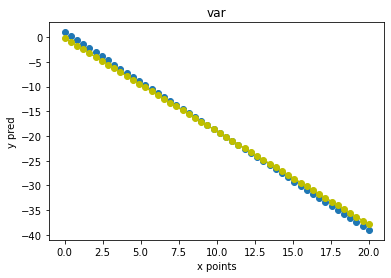

In [45]:
fig, ax = plt.subplots()
y_pred=theta0+theta1*x_points
#y_preda=theta0_a+theta1_a*x
ax.scatter(x_points,y_points)
ax.plot(x_points, y_pred,marker="o",color="y")
#ax.plot(x, y_preda,marker="v")
ax.set_xlabel("x points")
ax.set_ylabel("y pred")
ax.set_title("var")

In [46]:
def plot(x_points,y_points,theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list):
    fig, ax = plt.subplots(2,2)
    y_pred=theta0+theta1*x_points
    ax[0,0].plot(x_points,y_points,'*')
    ax[0,0].plot(x_points, y_pred,c='y')
    ax[0,1].plot(iteration_list,loss_list)
    ax[0,1].set_ylabel("loss")
    ax[0,1].set_xlabel("iterations")
    ax[1,0].plot(theta0_list,loss_list)
    ax[1,1].plot(theta1_list,loss_list)

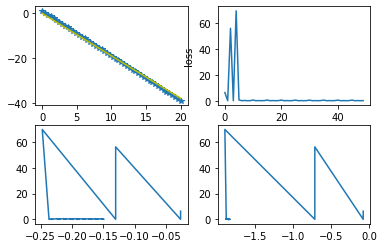

In [47]:
plot(x_points,y_points,theta0,theta1,epochs,loss_list,theta0_list,theta1_list,iteration_list)